#**1. Importing Required Packages** 

In [ ]:
#importing tensorflow.compat.v1 and disabling v2 behaviour

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np #for storing dataset
import matplotlib.pyplot as plt #for plotting purpose


#**2.Loading fashion_mnsit Dataset using Keras**

In [ ]:
#load fashion mnist dataset using keras

def load_data():
  
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (train_image_data, train_classes), (test_image_data, test_labels) = fashion_mnist.load_data()
  train_image_data=train_image_data/255.0
  test_image_data=test_image_data/255.0
  return (train_image_data,train_classes,test_image_data,test_labels);


In [ ]:
#downloading data and will store in four numpy arrays

train_image_data,train_classes,test_image_data,test_labels=load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#labels for claasified data
classification_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#**3. Exploring Dataset**

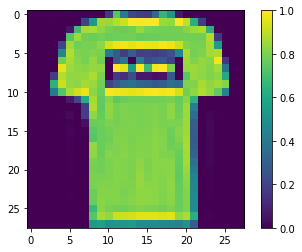

In [ ]:
#plotting a sample image from train data

plt.imshow(train_image_data[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_image_data.shape

(60000, 28, 28)

In [ ]:
train_classes.shape

(60000,)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
test_image_data.shape

(10000, 28, 28)

In [ ]:
train_classes


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
train_image_data[:3]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
test_image_data[:3]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

#**4. Randomally Splitting Training Data into Train Set and Validation Set**

In [ ]:
#split train data into train set and validation set using given fraction size of validation set

def split_train_data(train_image_data,validation_set_size,seed_val):
  
  from sklearn.model_selection import train_test_split
  train_set, validation_set, train_labels,validation_labels = train_test_split(train_image_data, train_classes, test_size=validation_set_size, random_state=seed_val)
  return (train_set, validation_set, train_labels,validation_labels);

In [ ]:
train_set, validation_set, train_labels,validation_labels=split_train_data(train_image_data,validation_set_size=0.15,seed_val=40)

#**5. Exploring Splitted Dataset**

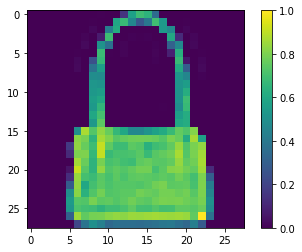

In [ ]:
#plotting a sample image from train set

plt.imshow(train_set[5])
plt.colorbar()
plt.grid(False)
plt.show()

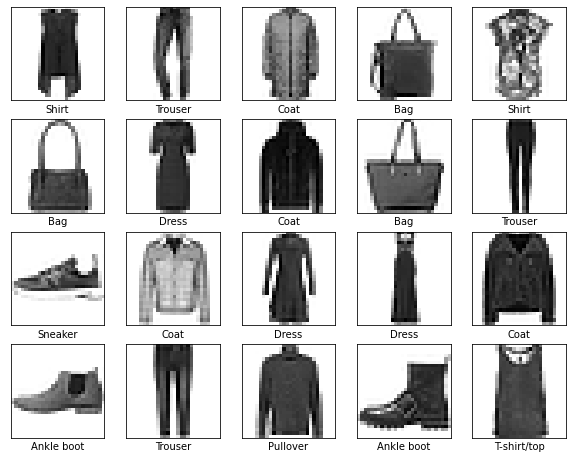

In [ ]:
#plotting some train set images with their provided labels

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i], cmap=plt.cm.binary)
    plt.xlabel(classification_labels[train_labels[i]])
plt.show()

In [ ]:
train_set.shape

(51000, 28, 28)

In [ ]:
validation_set.shape

(9000, 28, 28)

In [ ]:
train_labels.shape

(51000,)

In [ ]:
validation_labels.shape

(9000,)

#**6. Setting Parameters and Hyperparameters**

In [ ]:
#Parameters

n_input = 28 # Fashion MNIST img shape: 28*28, so each row has 28 entries ,and one row will be input
n_timesteps = 28 # Timesteps in RNN, as 28 rows are there and one time one row will be input so 28 timesteps
n_labels = 10 # fashion MNIST total classes (0-9 digits)

In [ ]:
#Hyperparameters

learning_rate = 0.001
n_hidden_states = 100 # hidden layer: num of features
layers=3

#**Building RNN**

In [ ]:
#Clears the default graph stack and resets the global default graph.

tf.reset_default_graph()

In [ ]:
def Build_RNN(n_hidden_states,X):

  # Unstack to get a list of tensors ,it will be passed to tf.nn.static_rnn() function
  x1 = tf.unstack(X, n_timesteps, 1)

  #defining rnn cell using tensorflow with activation function tanh
  rnn_cells = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_hidden_states, activation = 'tanh',reuse=tf.AUTO_REUSE) for layer in range(layers)]

  r_cells_drop = [tf.nn.rnn_cell.DropoutWrapper(cell, input_keep_prob=keep_prob) for cell in rnn_cells]

  multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(r_cells_drop)

  #creating RNN using tensorflow.compat.v1.nn.static_rnn
  output, state = tf.nn.static_rnn(multi_layer_cell, x1, dtype=tf.float32)

  return (output,state);

In [ ]:
#placeholders for the 'inputs'  and 'outputs'

inputs = tf.placeholder(tf.float32, [None, n_timesteps, n_input])
outputs = tf.placeholder(tf.int32, [None])
keep_prob = tf.placeholder(tf.float32)

In [ ]:
output,states=Build_RNN(n_hidden_states,inputs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:421: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


**Defining loss function,optimizer,prediction and accuracy**

In [ ]:

states_concat = tf.concat(axis=1, values=states, name='states_reshape')
dense1 = tf.layers.dense(states_concat, 64, name='dense_1')
dense2 = tf.layers.dense(dense1, 32, name='dense_2')
logits = tf.layers.dense(dense2, n_labels)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=outputs, logits=logits)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
prediction = tf.nn.in_top_k(logits, outputs, 1)
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [ ]:
#initializing all the global variables

init = tf.global_variables_initializer()


In [ ]:
#reshaping the validation set

X_validation = validation_set
Y_validation = validation_labels
X_vlidation = X_validation.reshape([-1, n_timesteps, n_input])



#**Training and Validation**

In [ ]:
#to save the best model and restore later
saver = tf.train.Saver()

In [ ]:
#defining variables to implement "Early Stopping"

patience=10 # patience for Early Stopping
epochs_without_improvement=0
best_loss=np.infty #best_loss upto the last epoch

In [ ]:
#defining list to create graphs later to analyze trained model

train_acc=[] #contain training accuracy of every epoch
validation_acc=[] #contain validation accuracy of every epoch
train_loss=[]  #contain training loss of every epoch
validation_loss=[]  #contain validation loss of every epoch

**Training and Validation**

In [ ]:
#function to return next batch of train set to be sent to train model

def next_batch(current_batch,batch_size,train_set,train_labels):

  i=current_batch*batch_size
  j=(current_batch+1)*batch_size
  X_train=train_set[i:j]
  Y_train=train_labels[i:j]
  return X_train,Y_train;


In [ ]:
batch_size = 50 #barch size to train model
n_epochs = 150 

with tf.Session() as sess:
    sess.run(init) 

    #number of barches(iterations) to complete one epoch
    n_batches = train_set.shape[0] // batch_size

    for epoch in range(n_epochs):
        for current_batch in range(n_batches):
            
            X_train,Y_train=next_batch(current_batch,batch_size,train_set,train_labels)
            X_train = X_train.reshape([-1, n_timesteps, n_input])

            #running optimization(Back Propogation) with dropout(retention probability) 0.8
            sess.run(optimizer, feed_dict={inputs: X_train, outputs: Y_train ,keep_prob: 0.8})

        #calculating loss and accuracy after completion of epoch for train set
        loss_train, acc_train = sess.run([loss, accuracy], feed_dict={inputs: X_train, outputs: Y_train,keep_prob: 0.8})

        #calculating loss and accuracy after completion of epoch for validation set
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={inputs: X_validation, outputs: Y_validation,keep_prob: 1.0})

        #appending data to lists to plot graphs later
        train_loss.append(loss_train)
        train_acc.append(acc_train)
        validation_loss.append(loss_val)
        validation_acc.append(acc_val)

        if epoch%5==0:
          print('Epoch {}:\nTrain Loss: {:.3f}, Train Acc: {:.3f}'.format( epoch + 1, loss_train, acc_train))
          print('Validation Loss: {:.3f}, Validation Acc: {:.3f}\n'.format(loss_val, acc_val))

          if best_loss>loss_val:
            #if train loss improved
            best_loss=loss_val

            #saving current best model
            saver.save(sess, "/logs_rnn/my_best_model.ckpt")
          else:
            epochs_without_improvement+=1

            #early stopping if perfomance is not improving over k(patience) iterations
            if epochs_without_improvement>=patience:
              print("\nEarly stopping at epoch {} ".format(epoch+1))
              break

    
    
        
  


    
  

Epoch 1:
Train Loss: 0.501, Train Acc: 0.860
Validation Loss: 0.566, Validation Acc: 0.801

Epoch 6:
Train Loss: 0.449, Train Acc: 0.860
Validation Loss: 0.491, Validation Acc: 0.825

Epoch 11:
Train Loss: 0.365, Train Acc: 0.840
Validation Loss: 0.415, Validation Acc: 0.854

Epoch 16:
Train Loss: 0.436, Train Acc: 0.840
Validation Loss: 0.410, Validation Acc: 0.854

Epoch 21:
Train Loss: 0.352, Train Acc: 0.860
Validation Loss: 0.427, Validation Acc: 0.848

Epoch 26:
Train Loss: 0.344, Train Acc: 0.820
Validation Loss: 0.399, Validation Acc: 0.860

Epoch 31:
Train Loss: 0.437, Train Acc: 0.860
Validation Loss: 0.447, Validation Acc: 0.839

Epoch 36:
Train Loss: 0.352, Train Acc: 0.800
Validation Loss: 0.437, Validation Acc: 0.848

Epoch 41:
Train Loss: 0.380, Train Acc: 0.840
Validation Loss: 0.414, Validation Acc: 0.853

Epoch 46:
Train Loss: 0.389, Train Acc: 0.860
Validation Loss: 0.471, Validation Acc: 0.827

Epoch 51:
Train Loss: 0.427, Train Acc: 0.840
Validation Loss: 0.545, Va

#**Testing**

In [ ]:
test_image_data=test_image_data.reshape([-1, n_timesteps, n_input])

In [ ]:
#Restoring saved model from "/logs_rnn/my_best_model" and testing on testdata

with tf.Session() as sess:
    saver.restore(sess, "/logs_rnn/my_best_model.ckpt") #restored model

    #testing model on testdata
    loss_test, acc_test = sess.run([loss, accuracy], feed_dict={inputs: test_image_data, outputs: test_labels,keep_prob: 1.0})
    print('Test Loss: {:.3f}, Test Acc: {:.3f}'.format(loss_test, acc_test))

INFO:tensorflow:Restoring parameters from /logs_rnn/my_best_model.ckpt
Test Loss: 0.406, Test Acc: 0.854


#**Graph Plots**

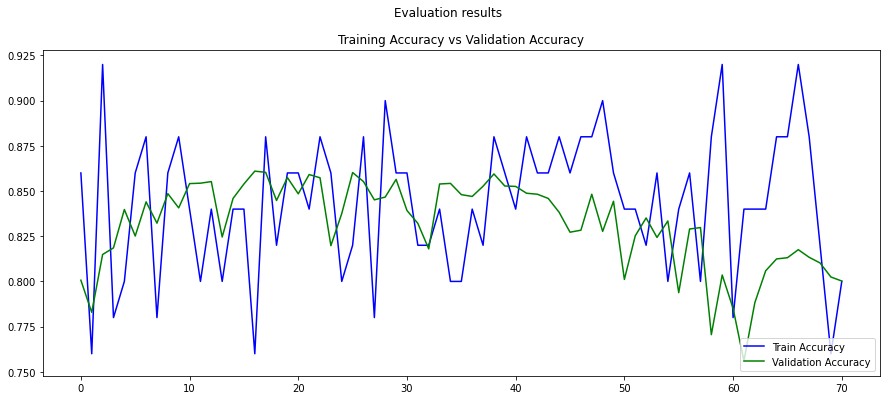

In [ ]:
#plotting graph between training acuracy vs validation accuracy

fig, (ax1) = plt.subplots(1, figsize=(15,6))
fig.suptitle('Evaluation results')
ax1.set_title("Training Accuracy vs Validation Accuracy")
ax1.plot(range(len(train_acc)), train_acc, color="b", label="Train Accuracy")
ax1.plot(range(len(validation_acc)), validation_acc, color="g", label="Validation Accuracy")
ax1.legend(loc='lower right')





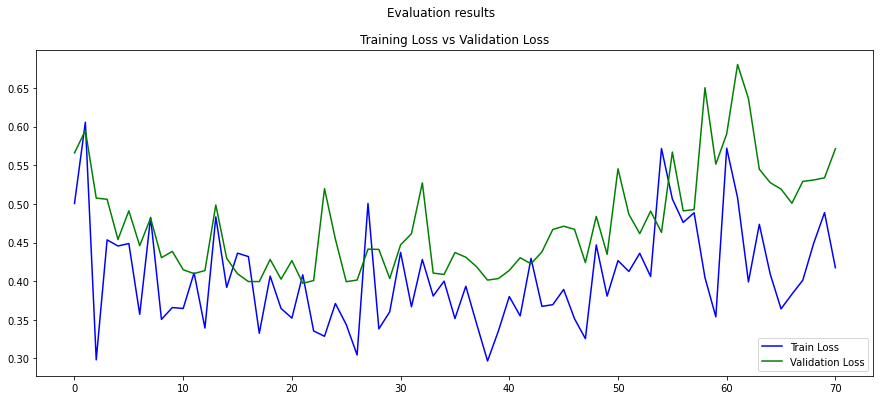

In [ ]:
#plotting graph between training loss vs validation loss

fig, (ax2) = plt.subplots(1, figsize=(15,6))
fig.suptitle('Evaluation results')
ax2.set_title("Training Loss vs Validation Loss")
ax2.plot(range(len(train_loss)), train_loss, color="b", label="Train Loss")
ax2.plot(range(len(validation_loss)), validation_loss, color="g", label="Validation Loss")
ax2.legend(loc='lower right')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "/logs_rnn/my_best_model.ckpt")
    prob = logits.eval(feed_dict={inputs: test_image_data, outputs: test_labels,keep_prob: 1.0})

INFO:tensorflow:Restoring parameters from /logs_rnn/my_best_model.ckpt


In [ ]:
def plot_predicted_entities():
  fig, (ax_s) = plt.subplots(1, 5, figsize=(15,10))

  perm = np.random.permutation(len(test_image_data))
  perm = perm[:5]
  for i in range(5):
      title = "Predicted value:" + classification_labels[np.argmax(prob[perm[i]])] + ",\nTrue value: " + classification_labels[test_labels[perm[i]]]
      ax_s[i].set_title(title)
      ax_s[i].imshow(test_image_data[perm[i]],cmap =plt.cm.gray_r, interpolation = "nearest")    

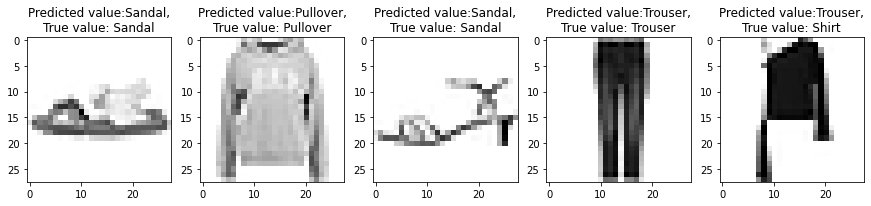

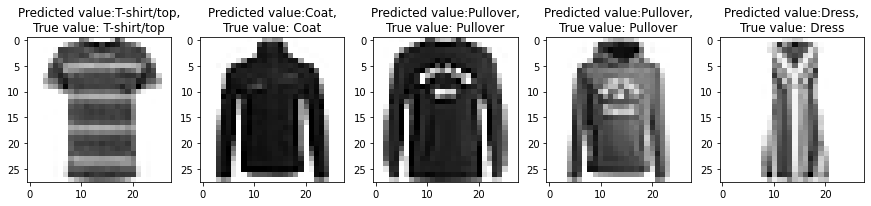

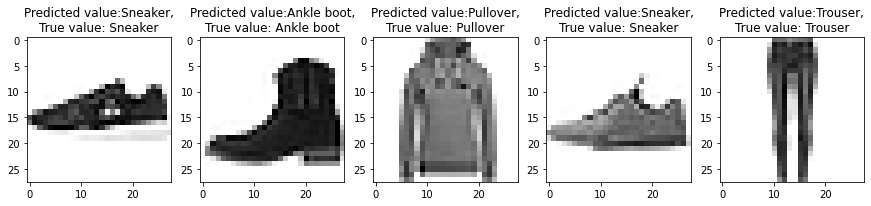

In [ ]:
plot_predicted_entities()
plot_predicted_entities()
plot_predicted_entities()